In [1]:
#Data cleaning and pre-processing

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv') #Reading from defined path of csv file.

Initial Analysis:

In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
1762,Wario Land: Shake It!,Wii,2008.0,Platform,Nintendo,0.59,0.31,0.15,0.10,1.15,NaN,NaN,NaN,NaN,NaN,NaN
7762,Just Dance: Greatest Hits,Wii,2012.0,Misc,Ubisoft,0.14,0.04,0.00,0.01,0.19,NaN,NaN,tbd,NaN,Ubisoft,E10+
2062,1942,NES,1985.0,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
4008,Ridge Racer 3D,3DS,2011.0,Racing,Namco Bandai Games,0.19,0.15,0.12,0.03,0.49,75.0,59.0,7.2,56.0,Namco Bandai Games,E
8983,Elf: The Movie,GBA,2004.0,Action,Crave Entertainment,0.10,0.04,0.00,0.00,0.15,NaN,NaN,tbd,NaN,Human Soft,E
5093,High Heat Major League Baseball 2003,PS2,2002.0,Sports,3DO,0.18,0.14,0.00,0.05,0.37,84.0,23.0,7.9,7.0,3DO,E
1845,Legend of Mana,PS,1999.0,Role-Playing,SquareSoft,0.18,0.13,0.73,0.07,1.11,NaN,NaN,NaN,NaN,NaN,NaN
1731,Fallout: New Vegas,PC,2010.0,Role-Playing,Bethesda Softworks,0.59,0.45,0.00,0.14,1.17,84.0,39.0,8.6,2754.0,Obsidian Entertainment,M
15525,Malice,PS2,2004.0,Platform,Evolved Games,0.01,0.01,0.00,0.00,0.02,51.0,11.0,tbd,NaN,Argonaut Games,T


In [5]:
df.shape

(16719, 16)

In [6]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [8]:
df.isna().sum()   #total null values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
df['User_Score'] = df['User_Score'].replace('tbd', None)   #Replacing tbd in user score with null

In [10]:
print(df['Platform'].value_counts())   #Unique values in platform

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [11]:
platform = df[['Platform', 'Critic_Score']]
platform.groupby(by=['Platform']).count()
#Finding not null critic score for each platform so that those can be excluded

,Critic_Score
Platform,
2600,0
3DO,0
3DS,168
DC,14
DS,717
GB,0
GBA,438
GC,448
GEN,0


In [12]:
print(df['Genre'].value_counts()) #Checking total not null values

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


In [13]:
print(df['Publisher'].value_counts())

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Ertain                             1
Interchannel-Holon                 1
Warp                               1
Bohemia Interactive                1
WayForward Technologies            1
Name: Publisher, Length: 581, dtype: int64


Publisher has lots of values.

In [14]:
print(df['Rating'].value_counts())

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64


In [15]:
print(df['Developer'].value_counts())


Ubisoft                             204
EA Sports                           172
EA Canada                           167
Konami                              162
Capcom                              139
                                   ... 
Konami Software Shanghai              1
EA Mythic                             1
Buka Entertainment, Targem Games      1
Hoget                                 1
Fresh 3D                              1
Name: Developer, Length: 1696, dtype: int64


Developer has lots of values.

In [16]:
df_curr = df[(df['Platform'] == '3DS') | (df['Platform'] == 'DS') | (df['Platform'] == 'GBA') | (df['Platform'] == 'GC') | (df['Platform'] == 'PC') | (df['Platform'] == 'PS') | (df['Platform'] == 'PS2') | (df['Platform'] == 'PS3') | (df['Platform'] == 'PS4') | (df['Platform'] == 'PSP') | (df['Platform'] == 'PSV') | (df['Platform'] == 'Wii') | (df['Platform'] == 'WiiU') | (df['Platform'] == 'X360') | (df['Platform'] == 'XB') | (df['Platform'] == 'XOne')]
#Using only relevant columns

In [17]:
platform = df_curr[['Platform', 'Critic_Score']]
platform.groupby(by=['Platform']).count()
#Checking values of critic_score in platform

,Critic_Score
Platform,
3DS,168
DS,717
GBA,438
GC,448
PC,715
PS,200
PS2,1298
PS3,820
PS4,252


In [18]:
df_curr.isna().sum() #Checking total null values again

Name                  0
Platform              0
Year_of_Release     248
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       7424
Critic_Count       7424
User_Score         6801
User_Count         7971
Developer          5465
Rating             5611
dtype: int64

In [19]:
df = df_curr[df_curr['Critic_Score'].notna()]
#Removed since there were lots of nulls

In [20]:
df.shape
#Final Shape

(8123, 16)

In [21]:
df = df.drop(['Name', 'Publisher', 'Developer', 'User_Count','JP_Sales','NA_Sales','EU_Sales'], axis = 1)  #Removing useless columns
df['Year_of_Release'] = df['Year_of_Release'].fillna(df['Year_of_Release'].median())
df['Critic_Count'] = df['Critic_Count'].fillna(df['Critic_Count'].median())
df['User_Score'] = df['User_Score'].astype(float)
df['User_Score'] = df['User_Score'].fillna(df['User_Score'].median())
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])
#Filling null values with a statistical measure

In [22]:
data = pd.get_dummies(data=df.copy(), columns=['Platform', 'Genre', 'Rating'])  #One Hot Encoding of data

In [23]:
Ycol = ["Global_Sales"] #Setting target variable
X_Col = list(data.columns)
X_Col.remove(Ycol[0])
X = data[X_Col]
Y = data[Ycol]
#Splitting into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=12)
#log scaling the values of target
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)
#Scaling data using min max scaler
minmaxscaler =  MinMaxScaler()
minmaxscaler.fit(X_train)

X_train_final = minmaxscaler.transform(X_train) 
X_test_final = minmaxscaler.transform(X_test)

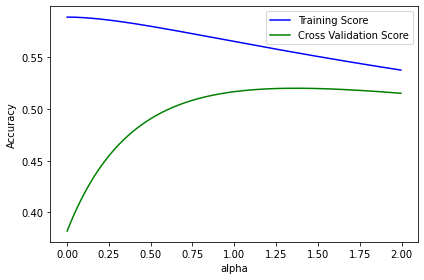

In [24]:
#validation curve for Ridge Regression

parameter_range=np.arange(0.001,2,0.005)
train_score, test_score=validation_curve(Ridge(), X_train_final,Y_train, param_name="alpha", n_jobs=-1,
      param_range=parameter_range, cv=6, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [25]:
#Linear Regression (RIDGE)

regr = Ridge(alpha=0.05)
regr.fit(X_train_final, Y_train)
y_pred=regr.predict(X_test_final)
print('R2 Score for RIDGE Regression : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME for Ridge Regression: ',rmse)

R2 Score for RIDGE Regression :  0.6239497530545164
RSME for Ridge Regression:  0.27163474574396407


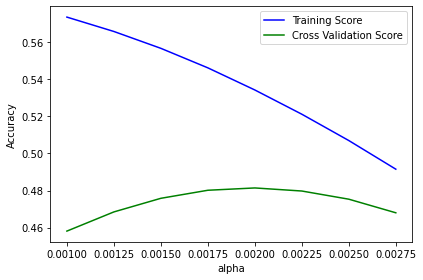

In [26]:
#validation curve for Lasso Regression

parameter_range=np.arange(0.001,0.003,0.00025)
train_score, test_score=validation_curve(Lasso(), X_train_final,Y_train, param_name="alpha", n_jobs=-1,
      param_range=parameter_range, cv=6, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [27]:
#Linear Regression(LASSO)


regr = Lasso(alpha=0.0008)
regr.fit(X_train_final, Y_train)
Y_pred=regr.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)

R2 Score :  0.6239497530545164
RSME:  0.27163474574396407


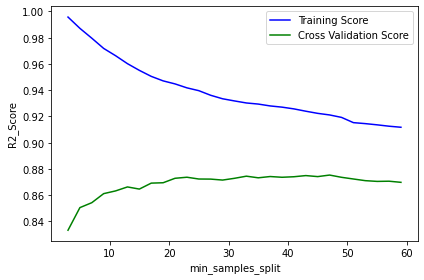

In [28]:
#Validation Curve for Decision Tree regression (hyperparameter min_sample_split)


parameter_range=np.arange(1,60,2)
train_score, test_score=validation_curve(DecisionTreeRegressor(), X_train_final,np.ravel(Y_train), param_name="min_samples_split", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("min_samples_split")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

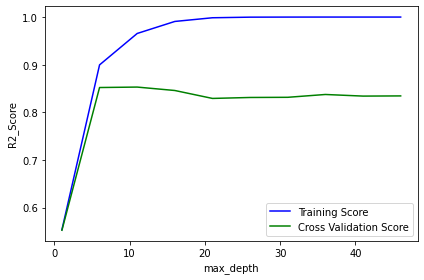

In [29]:
#Validation Curve for Decision Tree regression (hyperparameter max_depth)
parameter_range=np.arange(1,50,5)
train_score, test_score=validation_curve(DecisionTreeRegressor(), X_train_final,np.ravel(Y_train), param_name="max_depth", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("max_depth")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [31]:
#Decision Tree Regression


 # create regressor object
regressor = DecisionTreeRegressor(max_depth=8,min_samples_split=22)
  
# fit the regressor with x and y data
regressor.fit(X_train_final, np.ravel(Y_train))  
y_pred=regressor.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)

R2 Score :  0.8796861266283469
RSME:  0.15364563847821308


In [ ]:
#RandomizedSearchCV
#This takes time
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 5, stop = 40, num = 8)]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features}
rf_random = RandomizedSearchCV(RandomForestRegressor(), param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_final, np.ravel(Y_train))
rf_random.best_params_

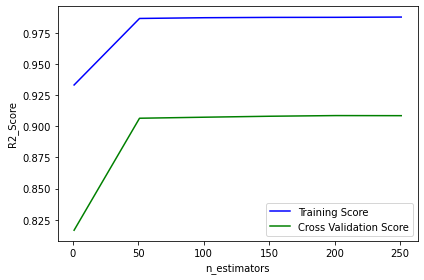

In [32]:
#Random Forest validation curve (hyper-parameter - n-estimators)

parameter_range=np.arange(1,301,50)
train_score, test_score=validation_curve(RandomForestRegressor(), X_train_final,np.ravel(Y_train), param_name="n_estimators", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("n_estimators")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

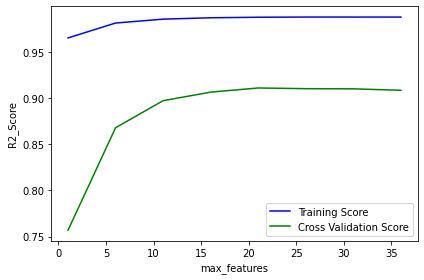

In [33]:
#Random Forest validation curve (hyper-parameter - max_features)
parameter_range=np.arange(1,41,5)
train_score, test_score=validation_curve(RandomForestRegressor(), X_train_final,np.ravel(Y_train), param_name="max_features", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("max_features")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [34]:
#Random Forest Regression

 # create regressor object
regressor1 = RandomForestRegressor(max_depth=50,max_features=30, n_estimators=30)
  
# fit the regressor with x and y data
regressor1.fit(X_train_final, np.ravel(Y_train))  
y_pred=regressor1.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)

R2 Score :  0.9203262693549211
RSME:  0.12503164892084054


In [35]:
#MLP Regression


#Create parameter grid based on earlier analysis
# Mlpr_grid = [
#     {'alpha': [0.1,0.01],'early_stopping': [True],'hidden_layer_sizes': [(10,5),(15,5),(18,5)], 'solver': ['lbfgs', 'adam','sgd'], 'batch_size': ['auto'],
#      'learning_rate': ['adaptive','invscaling'], 'max_iter': [10000,15000,20000], 'verbose': [True], 
#      'nesterovs_momentum': [True],  'validation_fraction': [0.12],
#      'random_state': [2,3],'activation': ['logistic','tanh', 'relu']}
# ]

# #Run gridsearchCV for MLPRegressor
# regressor = GridSearchCV(MLPRegressor(), Mlpr_grid, cv = 5, scoring='r2')
# regressor.fit(X_train_final, np.ravel(Y_train))  

# #print Best Parameters:
# print("Best Parameters = " ,regressor.best_params_)
#Above commented part takes lots of time to run, below part is for best parameters

#Run only the best found Parameter:
regressor = MLPRegressor(alpha=0.01,early_stopping= True, hidden_layer_sizes= (15,5),solver='lbfgs', batch_size ='auto',
     learning_rate ='adaptive', max_iter=10000, verbose=True, 
     nesterovs_momentum= True, validation_fraction= 0.12,
     random_state= 2,activation= 'logistic')
	 
regressor.fit(X_train_final, np.ravel(Y_train))  
y_pred=regressor.predict(X_test_final)


#Print R2 and RSME scores
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)





R2 Score :  0.9341014485880813
RSME:  0.11371043375383412


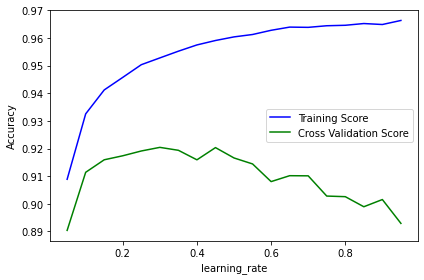

In [36]:
#Gradient Boosting validation Curve (hyper-parameter: Learning Rate)

parameter_range=np.arange(0.05,1,0.05)
train_score, test_score=validation_curve(GradientBoostingRegressor(), X_train_final,np.ravel(Y_train), param_name="learning_rate", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


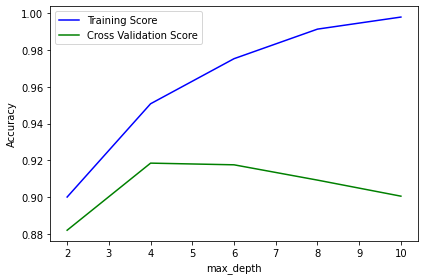

In [37]:
#Gradient Boosting validation Curve (hyper-parameter: Max Depth)
parameter_range=np.arange(2,11,2)
train_score, test_score=validation_curve(GradientBoostingRegressor(), X_train_final,np.ravel(Y_train), param_name="max_depth", n_jobs=-1,
      param_range=parameter_range, cv=5, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [38]:
#GradientBoost Regression

regressor = GradientBoostingRegressor(n_estimators = 200, max_depth = 5,learning_rate=0.1)
regressor.fit(X_train_final, np.ravel(Y_train)) 
y_pred = regressor.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)

R2 Score :  0.9370550776319728
RSME:  0.11113292199158865


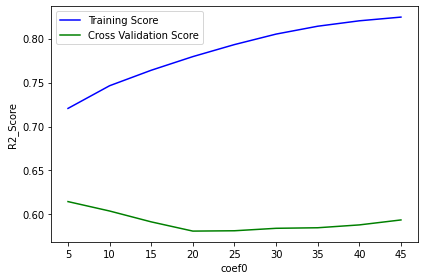

In [39]:

from sklearn import svm
parameter_range=np.arange(0,50,5)
train_score, test_score=validation_curve(svm.SVR(kernel='rbf'), X_train_final,Y_train, param_name="C", n_jobs=-1,
      param_range=parameter_range, cv=6, scoring="r2")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.ylabel("R2_Score")
plt.xlabel("coef0")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [40]:
 # create regressor object
poly_regressor = svm.SVR(kernel='poly', degree=2, coef0=0.45)
#SVR using polynomial kernel with degree 2
# fit the regressor with x and y data
poly_regressor.fit(X_train_final, np.ravel(Y_train))  
y_pred=poly_regressor.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)

R2 Score :  0.6731003722585974
RSME:  0.2532617451771427


In [41]:

clf = make_pipeline(StandardScaler(), svm.SVR(kernel='rbf', C=30))
clf.fit(X_train_final, np.ravel(Y_train))
y_pred=clf.predict(X_test_final)
print('R2 Score : ',r2_score(Y_test, y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print('RSME: ',rmse)
#SVM using standard scaler and pipelining

R2 Score :  0.8606488224647935
RSME:  0.1653551416349538
